# Сборный проект №1

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st

In [2]:
games = pd.read_csv('/games.csv')
games.info()
games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Подготовка данных

### Замена название столбцов (приведение к нижнему регистру);

In [3]:
games.columns = games.columns.str.lower()

### Преобразование данных в нужные типы.

In [4]:
# преобразуем year_of_release в int64
games['year_of_release'] = games['year_of_release'].astype('Int64')

# преобразуем user_score в int64
games['critic_score'] = games['critic_score'].astype('Int64')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Обработка пропусков при необходимости:
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

In [5]:
# посмотрим, что за пропуски в столбце 'name'
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
# Думаю их можно спокойно удалить
games.dropna(subset=['name'], inplace=True)

In [7]:
# 'tbd' означает, что будет определено, значить, что сейчас нам не известны, значит можно заменить на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)
# меняем тип на float64
games['user_score'] = games['user_score'].astype('float64')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


In [8]:
# Узнаем сколько пропустков в строке "year_of_release"
games['year_of_release'].isna().sum()

269

In [9]:
# можно спокойно удалить, так как нам очень важно знать дату
games.dropna(subset=['year_of_release'], inplace=True)

Есть много пропусков в столбцах 'year_of_release', 'critic_score', 'user_score', 'rating', но пока не понимаю зачем их заполнять

### Подсчёт суммарных продаж во всех регионах и запись их в отдельный столбец.

In [10]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Проведение исследовательского анализа данных

### Сколько игр выпускалось в разные годы

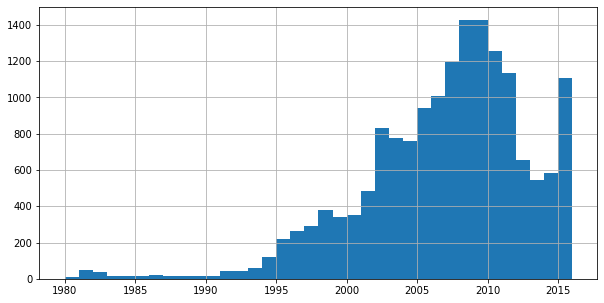

In [11]:
games['year_of_release'].hist(bins=36, figsize=(10, 5))

Можно увидеть рос начиная с 1993 года

### Как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [12]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

Отобрали топ-5 платформ по суммарным продажам. Теперь построим распределение по годам.

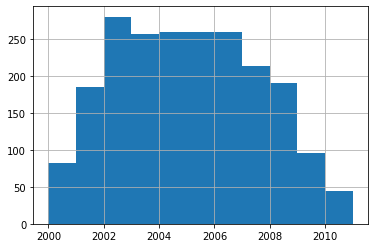

In [13]:
# PS2
games.query('platform == "PS2"')['year_of_release'].hist(bins=11)

Видно, что пик выпущенных игр для PS2 пришелся на 2002, немного спал в 2003 и не спадал вплоть до 2007. 

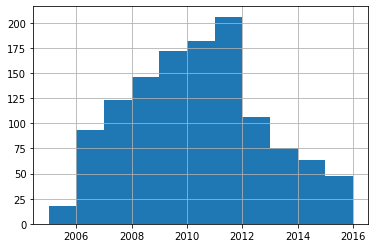

In [14]:
# X360
games.query('platform == "X360"')['year_of_release'].hist(bins=11)

С каждым годом виден рост игр дл X360. В 2012 в два раза меньше было выпущенно игр для X360, чем в прошлом году. Динамика пошла на спад.

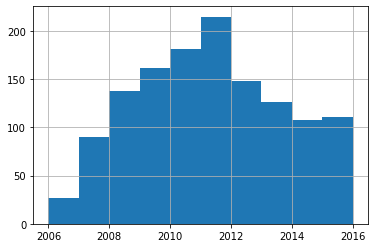

In [15]:
# PS3
games.query('platform == "PS3"')['year_of_release'].hist(bins=10)

Для PS3 мы видим равномерный подъем до 2011 и равномерный спад.

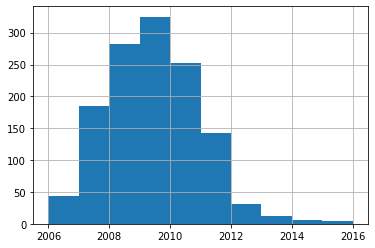

In [16]:
# Wii
games.query('platform == "Wii"')['year_of_release'].hist(bins=10)

Для Wii пик выпускаемых игр пришел на 2009 год. Начиная с 2012 года игр на Wii выпукалось меньше, по сравнению с предыдущими годами.

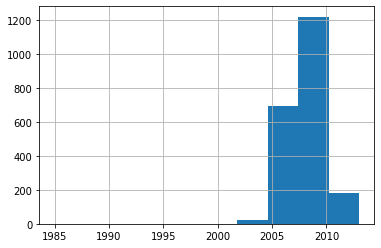

In [17]:
# DS
games.query('platform == "DS"')['year_of_release'].hist()

Можно увидеть, что есть одна игра, которая была выпущена только для рынка японии в 1985 году. Я думаю это ошибка. Игра была выпущена в 2010 году

In [18]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [19]:
# Исправим на 2010
games.loc[15957, 'year_of_release'] = 2010

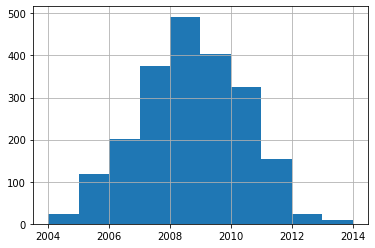

In [20]:
# DS
games.query('platform == "DS"')['year_of_release'].hist(bins=10, range=(2004, 2014))

Для DS игры начали выпускать в 2004 году и до 2014. Пик пришелся на 2008 год

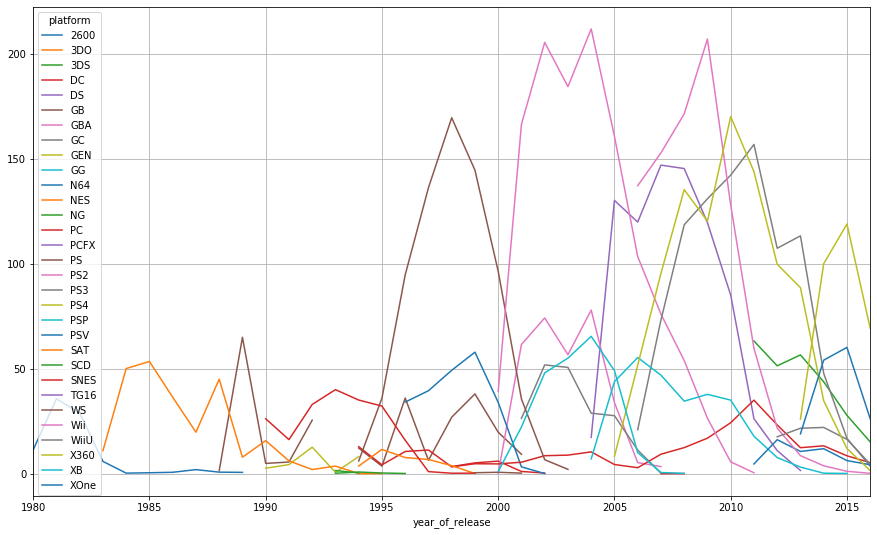

In [21]:
games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(grid=True, figsize=(15, 9))

Можно сделать вывод, что средний срок жизни платформы и выпускаемых для неё игр составляет примерно 8 лет.

### Возьмём данные за соответствующий актуальный период. 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [22]:
gm = games.query('year_of_release > 2013')

In [23]:
gm['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

Не учитывайте в работе данные за предыдущие годы.

### Какие платформы лидируют по продажам, растут или падают? 
Выберите несколько потенциально прибыльных платформ.

In [24]:
gm.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

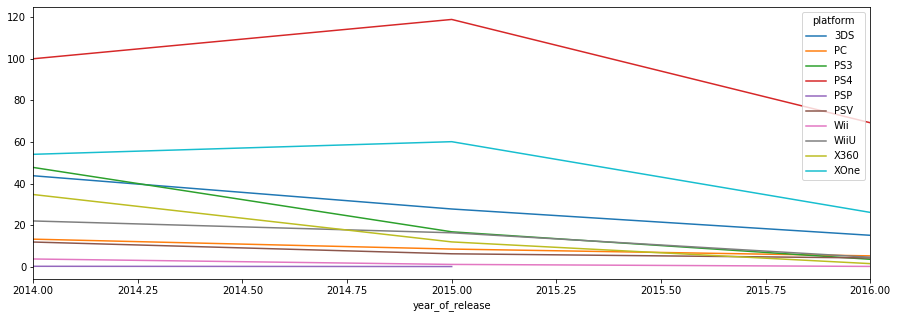

In [25]:
gm.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(15, 5))

Видео наибольшую популярность у платформ PS4, XOne

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
Опишите результат.

(0, 2)

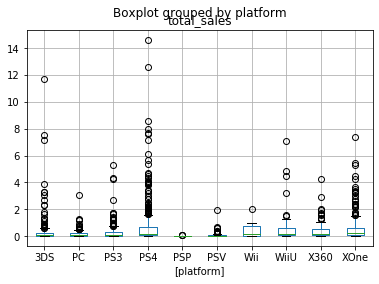

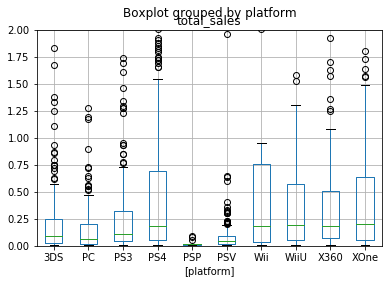

In [26]:
gm.boxplot(column=['total_sales'], by=['platform'])
plt.show

gm.boxplot(column=['total_sales'], by=['platform'])
plt.ylim(0, 2)

Можно увидеть, что повальное большинство продаж сосредоточенно около 1 млн копий. Самые большие выбросы есть у таких платформ как PS4, XOne и Wii.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**Оценка критиков**

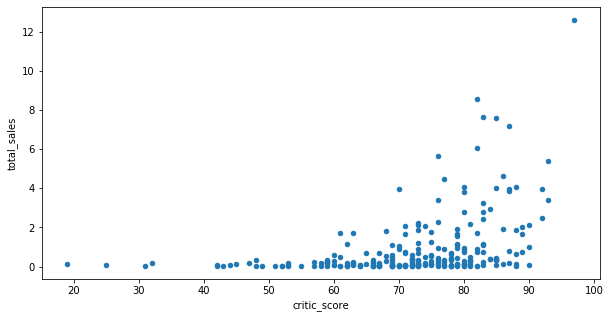

In [27]:
gm[gm['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', figsize = (10, 5))

In [28]:
PS4 = gm[gm['platform'] == 'PS4'].corr()
PS4.loc['critic_score', 'total_sales']

0.40266141068104083

Наблюдается слабая корреляция. Видно, что с ростом оценки идет рост продаж. Можно сказать, что корреляция положительная.

**Пользовательская оценка**

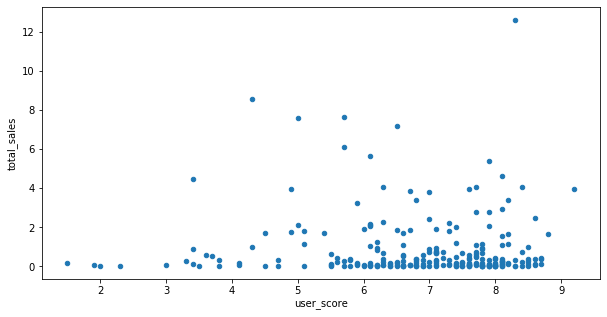

In [29]:
gm[gm['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize = (10, 5))

In [30]:
PS4.loc['user_score', 'total_sales']

-0.040131589472697356

Можно сказать, что корреляция отсутствует

### Соотнесите выводы с продажами игр на других платформах.

**Оценки критиков**

In [31]:
XOne = gm[gm['platform'] == 'XOne'].corr()
XOne.loc['critic_score', 'total_sales']

0.4286769437033325

In [32]:
ThreeDS = gm[gm['platform'] == '3DS'].corr()
ThreeDS.loc['critic_score', 'total_sales']

0.31411749286905105

Корреляция слабая

In [33]:
PS3 = gm[gm['platform'] == 'PS3'].corr()
PS3.loc['critic_score', 'total_sales']

0.4465746049319071

In [34]:
X360 = gm[gm['platform'] == 'X360'].corr()
X360.loc['critic_score', 'total_sales']

0.525722835658152

Корреляция положительная и можно сделать вывод, что хороший рейтинг игры действительно влияет на продажи.

**Пользовательские оценки**

In [35]:
XOne.loc['user_score', 'total_sales']

-0.07038392806475821

In [36]:
ThreeDS.loc['user_score', 'total_sales']

0.21519327185270282

In [37]:
PS3.loc['user_score', 'total_sales']

-0.1667614134766211

In [38]:
X360.loc['user_score', 'total_sales']

-0.13844457094566515

А у пользователей видно, что корреляции нет.

### Общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [39]:
genre_table = gm.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
genre_table.columns = ['genre', 'total_sales']

In [40]:
genre_table

,genre,total_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


(0, 4)

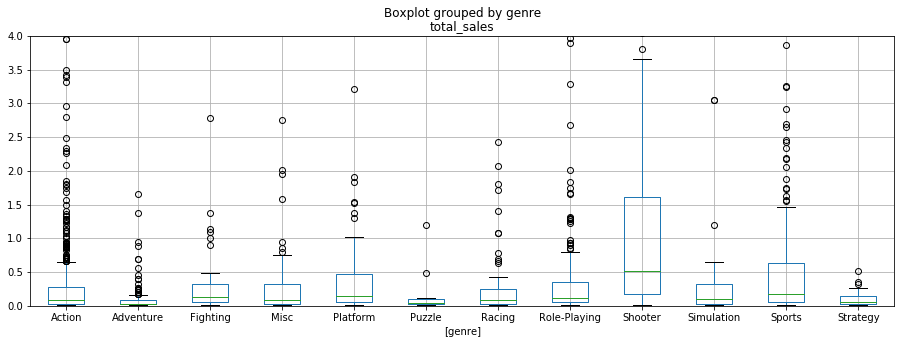

In [41]:
gm.boxplot(column=['total_sales'], by=['genre'], figsize=(15, 5))
plt.ylim(0, 4)

Больше всего денег принёс жанр Action с общей прибылью в 199 млн. Но 75% всех игр продаются меньше 0.5 млн. А вот у жанра Shooter (170 млн.) 75% продаются больше 1.5 млн, поэтому можно с уверенностью сказать, что жанр Shooter является самым прибыльным

## Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [42]:
# В столбце рейтинг много пропусков. Заменим их
gm['rating'] = gm['rating'].fillna('Unknown')

C:\Users\George\.conda\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Создадим сводные таблицы

In [43]:
# платформы
NA_pop_platform = gm.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_platform['percent'] = (NA_pop_platform['na_sales']/(NA_pop_platform['na_sales'].sum())).round(2)

EU_pop_platform = gm.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_platform['percent'] = (EU_pop_platform['eu_sales']/(EU_pop_platform['eu_sales'].sum())).round(2)

JP_pop_platform = gm.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_platform['percent'] = (JP_pop_platform['jp_sales']/(JP_pop_platform['jp_sales'].sum())).round(2)

# жанры
NA_pop_genre = gm.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_genre['percent'] = (NA_pop_genre['na_sales']/(NA_pop_genre['na_sales'].sum())).round(2)

EU_pop_genre = gm.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_genre['percent'] = (EU_pop_genre['eu_sales']/(EU_pop_genre['eu_sales'].sum())).round(2)

JP_pop_genre = gm.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_genre['percent'] = (JP_pop_genre['jp_sales']/(JP_pop_genre['jp_sales'].sum())).round(2)

# рейтинг
NA_pop_rating = gm.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
NA_pop_rating['percent'] = (NA_pop_rating['na_sales']/(NA_pop_rating['na_sales'].sum())).round(2)

EU_pop_rating = gm.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
EU_pop_rating['percent'] = (EU_pop_rating['eu_sales']/(EU_pop_rating['eu_sales'].sum())).round(2)

JP_pop_rating = gm.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
JP_pop_rating['percent'] = (JP_pop_rating['jp_sales']/(JP_pop_rating['jp_sales'].sum())).round(2)

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

,na_sales,percent
platform,,
PS4,98.61,0.35
XOne,81.27,0.29
X360,28.30,0.10
3DS,22.64,0.08
PS3,22.05,0.08


,eu_sales,percent
platform,,
PS4,130.04,0.48
XOne,46.25,0.17
PS3,25.54,0.09
PC,17.97,0.07
3DS,16.12,0.06


,jp_sales,percent
platform,,
3DS,44.24,0.48
PS4,15.02,0.16
PSV,14.54,0.16
PS3,11.22,0.12
WiiU,7.31,0.08


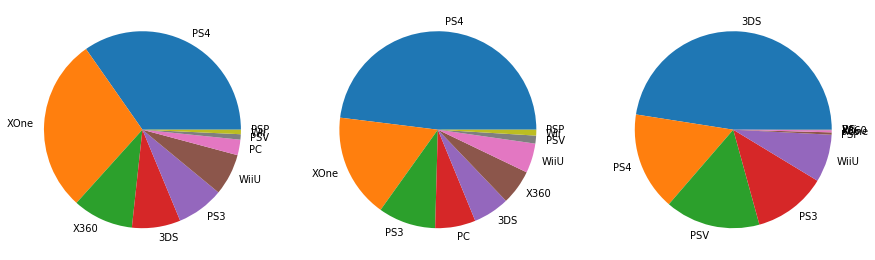

In [44]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie(NA_pop_platform['na_sales'], labels = NA_pop_platform.index)
ax[1].pie(EU_pop_platform['eu_sales'], labels = EU_pop_platform.index)
ax[2].pie(JP_pop_platform['jp_sales'], labels = JP_pop_platform.index)
plt.show

display(NA_pop_platform.head())
display(EU_pop_platform.head())
display(JP_pop_platform.head())

На рынке NA: В топ-5 популярных платформ входят X360, PS3, 3DS, XOne, PS4. Самой популярной является PS4 с долей в 35%.

На рынке EU: 48% от всех продаж занимает PS4. На втором месте XOne

А вот в регионе JP всё совершенно подругому. Самая популярная консоль 3DS - 48%. PS4 на втором месте - 16%

### Самые популярные жанры (топ-5). Поясните разницу.

,na_sales,percent
genre,,
Shooter,79.02,0.28
Action,72.53,0.26
Sports,46.13,0.16
Role-Playing,33.47,0.12
Misc,15.05,0.05


,eu_sales,percent
genre,,
Action,74.68,0.28
Shooter,65.52,0.24
Sports,45.73,0.17
Role-Playing,28.17,0.10
Racing,14.13,0.05


,jp_sales,percent
genre,,
Role-Playing,31.16,0.33
Action,29.58,0.32
Fighting,6.37,0.07
Misc,5.61,0.06
Shooter,4.87,0.05


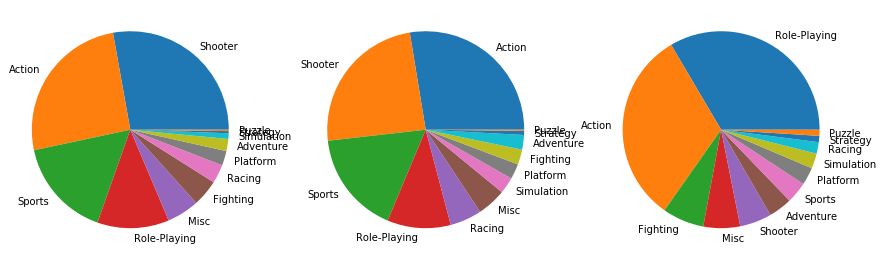

In [45]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie(NA_pop_genre['na_sales'], labels = NA_pop_genre.index)
ax[1].pie(EU_pop_genre['eu_sales'], labels = EU_pop_genre.index)
ax[2].pie(JP_pop_genre['jp_sales'], labels = JP_pop_genre.index)
plt.show

display(NA_pop_genre.head())
display(EU_pop_genre.head())
display(JP_pop_genre.head())

На рынке NA: В топ-5 популярных жанров входят Action, Shooter, Sports, Misc, Role-Playing. Самой популярной является Shooter с долей в 28%.

На рынке EU: 28% занимает жанр Action

На рынке JP: С огромным отрывом жанр Role-Playing (33%) отрывается от Action (32%). Shooter на 5 месте (5%)

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales,percent
rating,,
M,96.42,0.34
Unknown,64.72,0.23
E,50.74,0.18
T,38.95,0.14
E10+,33.23,0.12


,eu_sales,percent
rating,,
M,93.44,0.35
Unknown,58.95,0.22
E,58.06,0.21
T,34.07,0.13
E10+,26.16,0.10


,jp_sales,percent
rating,,
Unknown,56.90,0.61
T,14.78,0.16
E,8.94,0.10
M,8.01,0.09
E10+,4.46,0.05


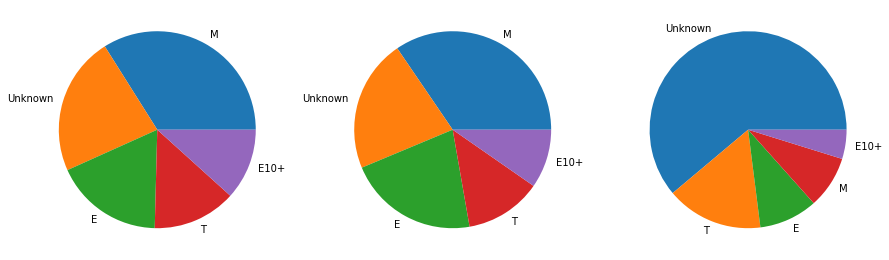

In [46]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].pie(NA_pop_rating['na_sales'], labels = NA_pop_rating.index)
ax[1].pie(EU_pop_rating['eu_sales'], labels = EU_pop_rating.index)
ax[2].pie(JP_pop_rating['jp_sales'], labels = JP_pop_rating.index)
plt.show

display(NA_pop_rating.head())
display(EU_pop_rating.head())
display(JP_pop_rating.head())

На рынке NA: Самый популярный рейтинг - M, с долей в 34%. На втором месте стоит E - 18%. А вот игры с неизвестным рейтингом составляет целых 23%.

На рынке EU: 35% занимает рейтинг M. А вот игры с неизвестным рейтингом составляет целых 22 процента.

На рынке JP:Целых 61% занимаеют игры с неизвестным рейтингом! На втором месте стоит рейтинг - E (16%)

### Общий вывод
Портрет пользователя живущего в NA регионе такой:
- Консоль - PS4
- Жанр - Shooter
- Рейтинг - M

Портрет пользователя живущего в EU регионе такой:
- Консоль - PS4
- Жанр - Action
- Рейтинг - M

Портрет пользователя живущего в JP регионе такой:
- Консоль - 3DS
- Жанр - Role-Playing
- Рейтинг - E или Unknown

## Шаг 5. Проверьте гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Выдвигаем нулевую гипотезу, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC разные"

In [47]:
XOne = gm.query('platform == "XOne"').user_score.dropna()
PC = gm.query('platform == "PC"').user_score.dropna()


alpha = 0.05


results = st.ttest_ind(
    XOne, 
    PC,
    equal_var=False)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [48]:
print('Средние пользовательские рейтинги у Xbox One -', XOne.mean())
print('Средние пользовательские рейтинги у PC -', PC.mean())

Средние пользовательские рейтинги у Xbox One - 6.594545454545456
Средние пользовательские рейтинги у PC - 6.298360655737705


Да, действительно стредние оценки у Xone и PC почти одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Выдвигаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports разные"

In [49]:
Action = gm.query('genre == "Action"').user_score.dropna()
Sports = gm.query('genre == "Sports"').user_score.dropna()


alpha = 0.05


results = st.ttest_ind(
    Action, 
    Sports,
    equal_var=False)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [50]:
print('Средние пользовательские рейтинги у Action -', Action.mean())
print('Средние пользовательские рейтинги у Sports -', Sports.mean())

Средние пользовательские рейтинги у Action - 6.760606060606061
Средние пользовательские рейтинги у Sports - 5.2251968503937


## Общий вывод

Вот какие выводы можно сделать из исследования:
 - Сильный рост выпуска игр прослеживается с 1993 года.
 - Средний срок жизни платформы/консоли составляет 8 лет.
 - Сейчас набирают рост такие платформы как PS4 и XOne.
 - Можно увидеть, что повальное большинство продаж для всех консолей сосредоточенно около 1 млн копий. Самые большие выбросы есть у PS4, XOne и 3DC.
 - Корреляция между оценками и продажами положительная, значит можно сделать вывод, что хороший рейтинг игры действительно влияет на продажи.
 - Больше всего денег принёс жанр Action с общей прибылью в 199 млн. Но 75% всех игр продаются меньше 0.5 млн. А вот у жанра Shooter (170 млн.) 75% продаются больше 1.5 млн, поэтому можно с уверенностью сказать, что жанр Shooter является самым прибыльным.<br> 
 2, 3 и 4 места занимают Shooter (170 млн.), Sports (109 млн.) и Role-Playing (101 млн.). Самым не прибыльным жанром является Puzzle (2.21 млн.) 
 - Портреты пользователей:
    - Портрет пользователя живущего в NA регионе такой:
        - Консоль - PS4
        - Жанр - Shooter
        - Рейтинг - M

    - Портрет пользователя живущего в EU регионе такой:
        - Консоль - PS4
        - Жанр - Action
        - Рейтинг - M

    - Портрет пользователя живущего в JP регионе такой:
        - Консоль - 3DS
        - Жанр - Role-Playing
        - Рейтинг - E или Unknown
    
 - После проверки гипотез были полученны такие результаты:
     - Гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть.
     - Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные была отвергнута.